<a href="https://colab.research.google.com/github/nuryduque63/final_redesneuronales/blob/main/Grupo_Trabajo_Final_Redes_Neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Descripción trabajo final**

<p>
  1. Analizar el código paso a paso y entenderlo y realizar una breve explicación de como funciona.<br>
  2. Realizar módificaciones variando parámetros como la cantidad de neuronas, tipo de optimizador, funciones de activación, funciones de perdida y tamaños de entrada de la imagen.<br>
  3. A partir del entendimiento del código en el punto 1 responda las siguientes preguntas: <br>
  <ul>
    <li> ¿Cual es el objetivo de categorizar los targets o labels correspondientes a cada imagen? </li>
    <li> ¿En que me ayuda la normalización a la hora de entrenar los datos? </li>
  </ul>
  <p>
  4. Realice un informe detallando los resultados obtenidos en el punto 2. El informe debe responder las siguiente preguntas:
  <ul>
    <li> ¿Cómo variaron los resultados con el aumento o disminución de las neuronas?</li>
    <li> ¿Cómo cambia la presición del modelo propuesto, al cambiar la función de activación, que se logra observar de los resultados?</li>
    <li> ¿Cuál sería a su criterio la función de activación que se adapta al presente análisis ?</li>
    <li> ¿Cómo se comportaron los resultados de las funciones de perdidas analizadas?</li>
    <li> ¿Mejoraron los resultados al reducir o aumentar el tamaño de entrada de la imagen?</li>
    <li> ¿Cuál fue la mejor solución que logró encontrar y por qué?</li>

  </ul>

  Nota: El informe debe llevar los valores que probaron en el módelo y para lo cuál como minimo se deben analizar 4 optimizadores,4 funciones de activación, 4 funciones de perdida, 4 opciones de neuronas y tamaños de entrada de la imagen. <br>
<p>
  5. Concluir en que casos se debe utilizar los optimizadores,funciones de perdida, funciones de activación y tener en cuenta que se debe presentar una gráfica representativa de cada función de activación describiendo los rangos de la función y su comportamiento.
</p>

##**Porcentajes de calificación:**


1.   Punto 1 : 10%
2.   Punto 2 : 10%
3.   Punto 3 : 10%
4.   Punto 4 : 25%
5.   Punto 5 : 15%
6.   Sustentación : 30%


##**Limitantes**
   Grupos máximo de 3 personas y mínimo de 2 personas


In [1]:
# Se instala la libreria de tensorflow
!pip install tensorflow

In [2]:
#Se instala la biblioteca de keras
!pip install keras

In [3]:
#Se importa o se carga la biblioteca de numpy
import numpy as np
from keras import layers, models
from keras.utils import to_categorical
#Cargamos los datasets (bases de datos) que se encuentran en keras.datasets
from keras.datasets import mnist
#Se carga la biblioteca de matplotlib la cual nos permite hacer graficas
import matplotlib.pyplot as plt



En la base de datos existen unos datos que se van a clasificar. Lo anterior corresponde a la data. Esos datos corresponde a digitos que aparecen en ciertas
imagenes. Tambien se tiene una clasificacion que son los numero del 0 al 9 y a eso le llamamos labels. Tanto data como labels se dividen en dos grupos
que son los datos de entrenamiento (train) y de prueba (test)

In [4]:
#Se dividen los datos en datos de entrenamiento (train_data, train_labels) y datos de prueba (test_data, test_labels)

(train_data, train_labels), (test_data, test_labels) =mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
#Se imprime el tipo de train_data
print(type(train_data))
#Se imprime el train_data
train_data

<class 'numpy.ndarray'>


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
#Se imprimen las dimensiones del train_data
#El resultado nos indica que tenemos 60 mil imagenes de 28 pixeles por 28 pixeles
train_data.shape

(60000, 28, 28)

In [7]:
#Imprimimos las dimensiones del primer dato del train_data
print(train_data[0].shape)

(28, 28)


In [8]:
#Verificamos el tamaño de los datos de prueba. Por todo lo anterior podemos concluir que la data a sido dividida en un 50%
#El 50% son datos para el entrenamiento y
print(train_data.shape)

(60000, 28, 28)


(28, 28)


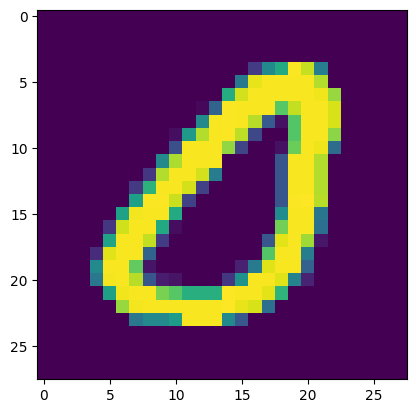

In [9]:
print(train_data[689].shape)
plt.imshow(train_data[689])

In [10]:
train_labels[689]

0

**Softmax – Rectified Lineal Unit**


La función Softmax transforma las salidas a una representación en forma de probabilidades, de tal manera que el sumatorio de todas las probabilidades de las salidas de 1.

https://www.alexisalulema.com/es/2022/09/23/funciones-de-activacion-en-tensorflow/

In [11]:
# @title Escoja la funcion de activacion:
lista_activacion = "tanh" #@param ["relu", "sigmoid", "tanh", "softplus", "relu6"]

In [12]:
"""
Utilizamos un modelo secuencial. En redes neuronales existen tres tipos de modelos: modelos secuenciales, modelos funcionales y modelos
y modelos de subclase
"""
model = models.Sequential()
#Definimos como unidades de entrada vectores cuya dimension es de 784 posiciones y como unidades de salida vectores de 512 posiciones
model.add(layers.Dense(512,activation=lista_activacion, input_shape=(28*28,))) #Capa de entrada
#Como estamos trabajando con un algoritmo de clasificacion y solo tenemos 10 posibilidades definimos un vector de salida de 10 posiciones
model.add(layers.Dense(10,activation='softmax')) #Capa de salida

In [13]:
# @title Escoja el optimizador de su preferencia:
optimizador = "SGD" #@param ["adam", "Nadam", "SGD", "RMSprop", "Adagrad"]

In [14]:
model.compile(optimizer= optimizador,
              loss='categorical_crossentropy',
              metrics= ['accuracy', 'Precision'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Los datos se normalizan con el fin de ajustar el rango de los mismos entre cero y uno. Seria incomodo trabajar con rangos muy grandes que como en este caso estarian entre 0 y 255.  "El objetivo de la normalización es cambiar los valores de las columnas numéricas del conjunto de datos para usar una escala común, sin distorsionar las diferencias en los intervalos de valores ni perder información. La normalización también es necesaria para que algunos algoritmos modelen los datos correctamente."**

In [16]:
#Redimensionamos el tensor pasandolo de tres dimensiones a uno de dos dimensiones
x_train = train_data.reshape((60000,28*28))
#Se Normalizan los datos
x_train = x_train.astype('float32')/255

#Idem al tratamiento del bloque anterior
x_test = test_data.reshape((10000,28*28))
x_test = x_test.astype('float32')/255

In [17]:
#Se imprime el prime dato del x_train para verificar su configuracion
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

**Se categorizan los datos de salida ya que este es un problema de clasificacion de 10 elementos (0-9)**

In [18]:
#Se categorizan los datos de salida ya que este es un problema de clasificacion de 10 elementos (0-9)
#Clases del dataset de entrenamiento
y_train = to_categorical(train_labels)
#Clases del dataset de prueba
y_test =to_categorical(test_labels)

In [19]:
train_labels[0]

5

In [20]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [21]:
#Se entrena el modelo con el metodo fit
history = model.fit(x_train, y_train, epochs=6, batch_size=128)

Epoch 1/6
469/469 [==============================] - 5s 9ms/step - loss: 0.9070 - accuracy: 0.7883 - precision: 0.9662
Epoch 2/6
469/469 [==============================] - 7s 15ms/step - loss: 0.4907 - accuracy: 0.8729 - precision: 0.9467
Epoch 3/6
469/469 [==============================] - 7s 14ms/step - loss: 0.4172 - accuracy: 0.8867 - precision: 0.9406
Epoch 4/6
469/469 [==============================] - 8s 17ms/step - loss: 0.3821 - accuracy: 0.8945 - precision: 0.9381
Epoch 5/6
469/469 [==============================] - 8s 18ms/step - loss: 0.3606 - accuracy: 0.8996 - precision: 0.9376
Epoch 6/6
469/469 [==============================] - 7s 16ms/step - loss: 0.3455 - accuracy: 0.9031 - precision: 0.9375


In [22]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.3238 - accuracy: 0.9109 - precision: 0.9406


[0.3238339424133301, 0.9108999967575073, 0.9406246542930603]

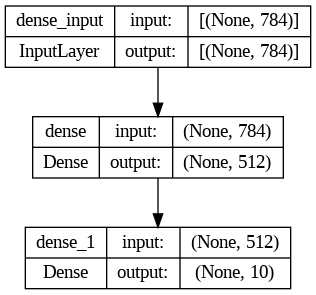

In [23]:
# Visualización
from keras.utils import plot_model
plot_model(model, to_file='model_sequential.png',show_shapes=True, show_layer_names=True)

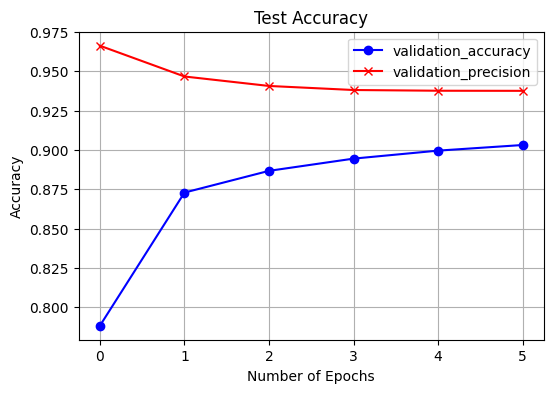

In [24]:
plt.figure(figsize=(6,4))
plt.plot(history.history["accuracy"], color="b", label="validation_accuracy", marker="o")
plt.plot(history.history['precision'], color="r", label="validation_precision", marker="x")
plt.title("Test Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()


In [25]:
import pandas as pd
#"predictions" va a tener un valor de probabilidas para cada clase
predictions = model.predict(x_test)


predictions_df = pd.DataFrame({'ImageId': range(1, len(predictions) + 1), 'Label': predictions.argmax(axis=1)})
predictions_df

313/313 [==============================] - 1s 4ms/step


,ImageId,Label
0,1,7
1,2,2
2,3,1
3,4,0
4,5,4
...,...,...
9995,9996,2
9996,9997,3
9997,9998,4
9998,9999,5


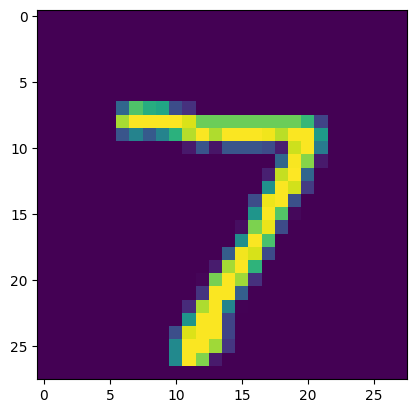

In [26]:
plt.imshow(test_data[0])

https://github.com/DavidReveloLuna/Bird_Classification-/blob/master/ConfusionMatrix.ipynb

https://www.youtube.com/watch?v=cS8EQYPpsmU

**MATRIZ DE CONFUSION**

Se imprimen las probabilidades para la prediccion del valor de la primera posicion la cual es siete.
[1.4962263e-04 4.8780589e-07 7.5281918e-05 1.3824779e-03 1.6346792e-05
 5.7307469e-05 1.2165532e-06 9.9653912e-01 8.9414323e-05 1.6887076e-03]
Se imprime la probabilidad mas alta para la posicion cero
7
2


(<Figure size 700x700 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

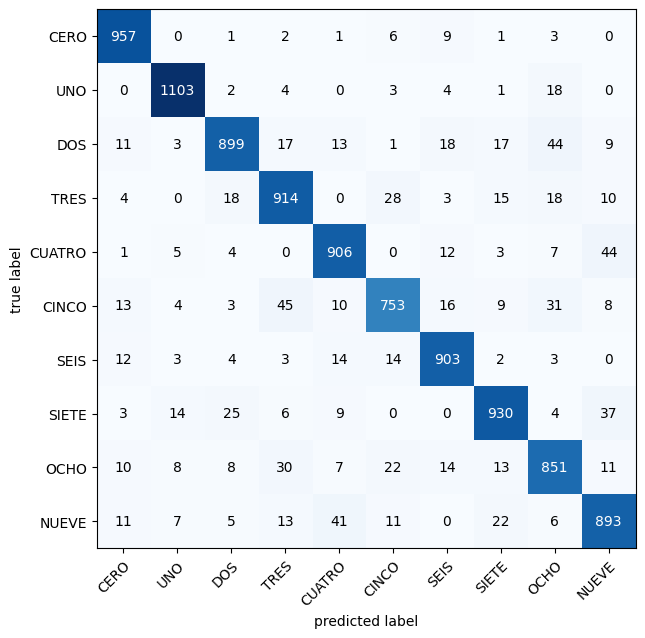

In [27]:
"""A continuacion vamos a imprimir la matriz de confusion la cual es un indicador del cual podemos hallar metricas tales como
F1-Score, precision"""
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

names = ['CERO','UNO','DOS','TRES','CUATRO','CINCO','SEIS','SIETE','OCHO','NUEVE']

#"y-pred" va a tener el valor de probabilidad mas alto para cada clase
y_pred = np.argmax(predictions, axis=1)
print("Se imprimen las probabilidades para la prediccion del valor de la primera posicion la cual es siete.")
print(predictions[0])
print("Se imprime la probabilidad mas alta para la posicion cero")
print(y_pred[0])
print(test_labels[1])
#La matriz de confusion la elaboramos cruzando los valores predichos y los valores que se encuentran  en test_labels (valores verdaderos)
matc=confusion_matrix(test_labels, y_pred)
plot_confusion_matrix(conf_mat=matc, figsize=(7,7), class_names = names, show_normed=False)

In [28]:
from sklearn import metrics
print(metrics.classification_report(test_labels, y_pred, digits = 4))

              precision    recall  f1-score   support

           0     0.9364    0.9765    0.9560       980
           1     0.9616    0.9718    0.9667      1135
           2     0.9278    0.8711    0.8986      1032
           3     0.8839    0.9050    0.8943      1010
           4     0.9051    0.9226    0.9138       982
           5     0.8986    0.8442    0.8705       892
           6     0.9224    0.9426    0.9324       958
           7     0.9181    0.9047    0.9113      1028
           8     0.8640    0.8737    0.8688       974
           9     0.8824    0.8850    0.8837      1009

    accuracy                         0.9109     10000
   macro avg     0.9100    0.9097    0.9096     10000
weighted avg     0.9109    0.9109    0.9106     10000



**CONCLUSIONES**

En el proyecto se han adicionado formularios para conseguir una mejor interaccion con el usuario.

Podemos ver que cuando variamos algunos parametros en el codigo aumenta o dismuye la presicion del modelo.

Por ejemplo si colocamos la funcion de activacion tanh y un optimizador SGD, se consigue una mejor presicion en el modelo.

